In [1]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class first_assignment:
    
    def __init__(self, parameter_C, parameter_fun, parameter_Q, parameter_N, parameter_B, parameter_S):
        self.parameter_C = parameter_C
        self.parameter_fun = parameter_fun
        self.parameter_Q = parameter_Q
        self.parameter_N = parameter_N
        self.parameter_B = parameter_B
        self.parameter_S = parameter_S
    
    def __call__(self):       
        if self.parameter_fun == 1:
            return self.function_1()
        elif self.parameter_fun == 2:
            return self.function_2()
        elif self.parameter_fun == 3:
            return self.function_3()
        elif self.parameter_fun == 4:
            return self.function_4()
        elif self.parameter_fun == 5:
            return self.function_5()

    def digitize(self, image):
        z = []
        size = (self.parameter_N, self.parameter_N)

        if (len(image) % self.parameter_N == 0):
            for i in range(0, len(image), int(len(image)/self.parameter_N)):
                for j in range(0, len(image), int(len(image)/self.parameter_N)):
                    z.append(image[i][j])
        else:
            for i in range(self.parameter_N):
                for j in range(self.parameter_N):
                    z.append(image[i][j])            
        return np.reshape(np.array(z), size)
    
    def normalize_float(self, image):
        min_ = np.min(image)
        max_ = np.max(image)
        normalized_image = (((image - min_)/(max_ - min_))*65535).astype(np.uint16)
        return normalized_image
    
    def quantization(self, image):
        min_ = np.min(image)
        max_ = np.max(image)
        quantized_image = (((image - min_)/(max_ - min_))*255).astype(np.uint8)
        return quantized_image
    
    def bit_shift(self, image):
        return image >> (8-self.parameter_B)
    
    def function_1(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = x*y + 2*y
        
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_2(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = np.abs(np.cos(x/self.parameter_Q) + 2* np.sin(y/self.parameter_Q))
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_3(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = np.abs(3*(x/self.parameter_Q) - np.cbrt(y/self.parameter_Q))
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_4(self):
        random.seed(self.parameter_S)
        image = np.zeros([self.parameter_C, self.parameter_C])
        #image = np.random.randint(0,2,[self.parameter_C,self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = random.uniform(0,1)
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_5(self):
        random.seed(self.parameter_S)
        image = np.zeros([self.parameter_C, self.parameter_C])
        steps = 1 + self.parameter_C*self.parameter_C
        x,y = 0,0

        for step in range(steps):
            image[x, y] = 1
            dx = random.randint(-1,1)
            dy = random.randint(-1,1)
            x = (x + dx) % self.parameter_C
            y = (y + dy) % self.parameter_C
            image[x, y] = 1

        #image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))

In [3]:
def RMSE(image1, image2):
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

def comparing_images(image1, image2):
    _ = plt.figure(figsize=(10,10))
    _ = plt.subplot(1,2,1)
    _ = plt.imshow(image1, cmap='gray')
    _ = plt.subplot(1,2,2)
    _ = plt.imshow(image2, cmap='gray')
    plt.show()

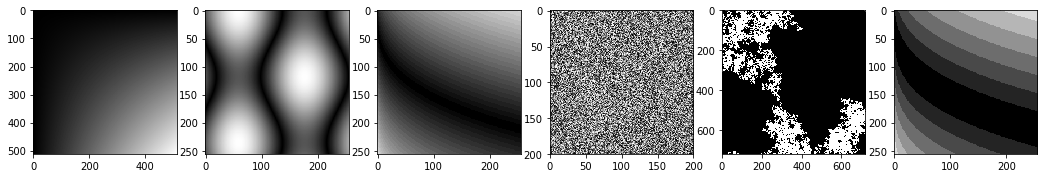

In [4]:
img_1 = first_assignment(512, 1, 1, 512, 8, 1).function_1()
img_2 = first_assignment(512, 2, 75, 256, 8, 1).function_2()
img_3 = first_assignment(720, 3, 1001, 256, 5, 1).function_3()
img_4 = first_assignment(500, 4, 13, 200, 7, 13).function_4()
img_5 = first_assignment(1024, 5, 1, 720, 1, 51).function_5()
img_6 = first_assignment(360, 3, 1001, 256, 3, 51).function_3()

_ = plt.figure(figsize=(18,18))
_ = plt.subplot(1,6,1)
_ = plt.imshow(img_1, cmap='gray')
_ = plt.subplot(1,6,2)
_ = plt.imshow(img_2, cmap='gray')
_ = plt.subplot(1,6,3)
_ = plt.imshow(img_3, cmap='gray')
_ = plt.subplot(1,6,4)
_ = plt.imshow(img_4, cmap='gray')
_ = plt.subplot(1,6,5)
_ = plt.imshow(img_5, cmap='gray')
_ = plt.subplot(1,6,6)
_ = plt.imshow(img_6, cmap='gray')

RMSE for figure 1: 0.000000
RMSE for figure 2: 0.000000
RMSE for figure 3: 6.903542
RMSE for figure 4: 10.240266
RMSE for figure 5: 0.288605
RMSE for figure 6: 0.012353


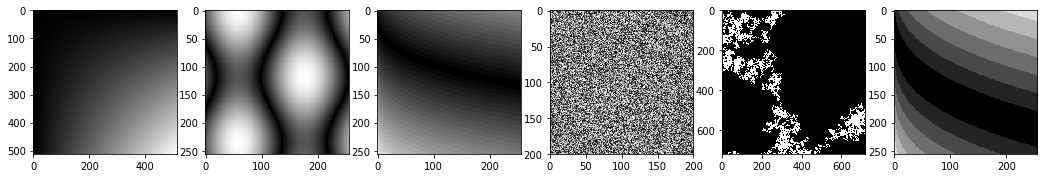

In [5]:
image_test1 = np.load('test_cases/case1.npy')
image_test2 = np.load('test_cases/case2.npy')
image_test3 = np.load('test_cases/case3.npy')
image_test4 = np.load('test_cases/case4.npy')
image_test5 = np.load('test_cases/case5.npy')
image_test6 = np.load('test_cases/case6.npy')

_ = plt.figure(figsize=(18,18))
_ = plt.subplot(1,6,1)
_ = plt.imshow(image_test1, cmap='gray')
_ = plt.subplot(1,6,2)
_ = plt.imshow(image_test2, cmap='gray')
_ = plt.subplot(1,6,3)
_ = plt.imshow(image_test3, cmap='gray')
_ = plt.subplot(1,6,4)
_ = plt.imshow(image_test4, cmap='gray')
_ = plt.subplot(1,6,5)
_ = plt.imshow(image_test5, cmap='gray')
_ = plt.subplot(1,6,6)
_ = plt.imshow(image_test6, cmap='gray')

print('RMSE for figure 1: {:f}'.format(RMSE(img_1, image_test1)))
print('RMSE for figure 2: {:f}'.format(RMSE(img_2, image_test2)))
print('RMSE for figure 3: {:f}'.format(RMSE(img_3, image_test3)))
print('RMSE for figure 4: {:f}'.format(RMSE(img_4, image_test4)))
print('RMSE for figure 5: {:f}'.format(RMSE(img_5, image_test5)))
print('RMSE for figure 6: {:f}'.format(RMSE(img_6, image_test6)))